In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import suite2p

/home/mbo/miniconda3/envs/suite2p/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [2]:
ops = suite2p.default_ops()

In [3]:
import matplotlib as mpl
mpl.rcParams.update({
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.frameon': False,
    'figure.subplot.wspace': .01,
    'figure.subplot.hspace': .01,
    'figure.figsize': (18, 13),
    'ytick.major.left': True,
})
jet = mpl.cm.get_cmap('jet')
jet.set_bad(color='k')

/tmp/ipykernel_2744406/1385736914.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = mpl.cm.get_cmap('jet')


In [75]:
parent_path = Path().home() / 'caiman_data' / 'kalyan'
save_path0 = Path().home() / 'caiman_data' / 'suite2p'
files = [x for x in parent_path.glob('*.tif')]
files

[PosixPath('/home/flynn/caiman_data/kalyan/M01.tif')]

In [76]:
save_path = parent_path / 'results'
db = {
    'data_path': [str(parent_path)],
    'save_path0': str(save_path),
    'tiff_list': ['M01.tif'],
}
db

{'data_path': ['/home/flynn/caiman_data/kalyan'],
 'save_path0': '/home/flynn/caiman_data/kalyan/results',
 'tiff_list': ['M01.tif']}

In [62]:
ops = suite2p.default_ops()

ops['data_path'] = str(files[0])
ops['save_path'] = parent_path
ops['batch_size'] = 1000
ops['fs'] = 10
ops['tau'] = 0.1
ops['preclassify'] = 0.0
ops['aspect'] = 1.0
ops['do_bidiphase'] = True
ops['bidiphase'] = -1
ops['do_registration'] = 1
ops['two_step_registration'] = 0
ops['nimg_init'] = 500
ops['maxregshift'] = 0.5
ops['align_by_chan'] = 1
ops['reg_tif'] = False
ops['reg_tif_chan2'] = False
ops['subpixel'] = False
ops['th_badframes'] = 1.0
ops['smooth_sigma'] = 1.15
ops['th_badframes'] = 1.0
ops['norm_frames'] = True
ops['force_refImg'] = False
ops['pad_fft'] = False
ops['nonrigid'] = True
ops['block_size'] = [128, 128]
ops['snr_thresh'] = 0.8
ops['maxregshiftNR'] = 5.0
ops['1Preg'] = False
ops['spatial_hp_reg'] = 42.0
ops['pre_smooth'] = 0.0
# ops['spatial_taper'] = 40.0
ops['roidetect'] = True
ops['spikedetect'] = True
ops['sparse_mode'] = True
# ops['spatial_scale'] = 0
ops['connected'] = True
# ops['nbinned'] = 5000
# ops['max_iterations'] = 20
ops['threshold_scaling'] = 1.0
# ops['max_overlap'] = 0.75
# ops['high_pass'] = 100.0
# ops['spatial_hp_detect'] = 25.0
# ops['denoise'] = 0.0
# ops['anatomical_only'] = 3
# ops['cellprob_threshold'] = -5.0
# ops['flow_threshold'] = -5.0
# ops['spatial_hp_cp'] = 0.0
# ops['pretrained_model'] = 'cyto'
# ops['soma_crop'] = 1.0
ops['neuropil_extract'] = True
# ops['inner_neuropil_radius'] = 2
# ops['min_neuropil_pixels'] = 350
# ops['lam_percentile'] = 50.0
# ops['allow_overlap'] = False
# ops['use_builtin_classifier'] = False
# ops['baseline'] = 'maxmin'
# ops['win_baseline'] = 60.0
# ops['sig_baseline'] = 10.0
# ops['prctile_baseline'] = 8.0
# ops['neucoeff'] = 0.7

print(ops)

{'suite2p_version': '0.14.4', 'look_one_level_down': False, 'fast_disk': [], 'delete_bin': False, 'mesoscan': False, 'bruker': False, 'bruker_bidirectional': False, 'h5py': [], 'h5py_key': 'data', 'nwb_file': '', 'nwb_driver': '', 'nwb_series': '', 'save_path0': '', 'save_folder': [], 'subfolders': [], 'move_bin': False, 'nplanes': 1, 'nchannels': 1, 'functional_chan': 1, 'tau': 0.1, 'fs': 10, 'force_sktiff': False, 'frames_include': -1, 'multiplane_parallel': False, 'ignore_flyback': [], 'preclassify': 0.0, 'save_mat': False, 'save_NWB': False, 'combined': True, 'aspect': 1.0, 'do_bidiphase': True, 'bidiphase': -1, 'bidi_corrected': False, 'do_registration': 1, 'two_step_registration': 0, 'keep_movie_raw': False, 'nimg_init': 500, 'batch_size': 1000, 'maxregshift': 0.5, 'align_by_chan': 1, 'reg_tif': False, 'reg_tif_chan2': False, 'subpixel': False, 'smooth_sigma_time': 0, 'smooth_sigma': 1.15, 'th_badframes': 1.0, 'norm_frames': True, 'force_refImg': False, 'pad_fft': False, 'nonrigi

In [110]:
ops = suite2p.default_ops()
ops['tau'] = 1.0
ops['fs'] = 8.6
ops['max_overlap'] = 0.9
ops['high_pass'] = 10
ops['spatial_hp_detect'] = 25
ops['smooth_sigma'] = 2
ops['smooth_sigma_time'] = 2
ops['keep_movie_raw'] = True
ops['two_step_registration'] = True
ops['do_bidiphase'] = True
ops['pad_fft'] = True
ops['do_registration'] = 1
ops['spatial_taper']=5

In [124]:
ops = suite2p.default_ops()
output_ops = suite2p.run_s2p(ops=ops, db=db)

{'data_path': ['/home/flynn/caiman_data/kalyan'], 'save_path0': '/home/flynn/caiman_data/kalyan/results', 'tiff_list': ['M01.tif']}
tif
** Found 1 tifs - converting to binary **
2000 frames of binary, time 0.34 sec.
4000 frames of binary, time 0.44 sec.
time 0.63 sec. Wrote 5000 frames per binary for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: applying default /home/flynn/.suite2p/classifiers/classifier_user.npy
----------- REGISTRATION
Reference frame, 0.90 sec.
Registered 500/5000 in 0.57s
Registered 1000/5000 in 1.08s
Registered 1500/5000 in 1.52s
Registered 2000/5000 in 1.96s
Registered 2500/5000 in 2.43s
Registered 3000/5000 in 2.92s
Registered 3500/5000 in 3.40s
Registered 4000/5000 in 3.85s
Registered 4500/5000 in 4.27s
Registered 5000/5000 in 4.74s
----------- Total 6.13 sec
Registration metrics, 6.70 sec.
----------- ROI DETECTION
Binning movie

/home/flynn/miniforge3/envs/suite2p/lib/python3.9/site-packages/suite2p/detection/sparsedetect.py:286: UserWarning: Spatial scale estimation failed.  Setting spatial scale to 1 in order to continue.
  warn(


NOTE: FORCED spatial scale ~6 pixels, time epochs 1.00, threshold 5.00 
0 ROIs, score=38.81
Detected 189 ROIs, 1.62 sec
After removing overlaps, 124 ROIs remain
----------- Total 1.99 sec.
----------- EXTRACTION
Masks created, 0.11 sec.
Extracted fluorescence from 124 ROIs in 5000 frames, 0.50 sec.
----------- Total 0.61 sec.
----------- CLASSIFICATION
['compact', 'skew', 'npix_norm']
----------- SPIKE DECONVOLUTION
----------- Total 0.03 sec.
Plane 0 processed in 15.50 sec (can open in GUI).
total = 16.14 sec.
TOTAL RUNTIME 16.14 sec


In [125]:
len(output_ops)

130

In [126]:
print(set(output_ops.keys()).difference(ops.keys()))

{'Lx', 'rmax', 'Lyc', 'meanImg', 'refImg', 'Ly', 'timing', 'input_format', 'meanImgE', 'xoff', 'Vsplit', 'max_proj', 'filelist', 'Vmax', 'date_proc', 'nframes', 'Lxc', 'data_path', 'corrXY1', 'yoff', 'xoff1', 'regDX', 'Vmap', 'corrXY', 'ops_path', 'yrange', 'save_path', 'tPC', 'ihop', 'regPC', 'first_tiffs', 'rmin', 'frames_per_folder', 'xrange', 'tiff_list', 'reg_file', 'badframes', 'spatscale_pix', 'Vcorr', 'frames_per_file', 'yoff1'}


In [127]:
list(Path(output_ops['save_path']).iterdir())

[PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/spks.npy'),
 PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/Fneu.npy'),
 PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/iscell.npy'),
 PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/data.bin'),
 PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/stat.npy'),
 PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/F.npy'),
 PosixPath('/home/flynn/caiman_data/kalyan/results/suite2p/plane0/ops.npy')]

In [128]:
output_op_file = np.load(Path(output_ops['save_path']).joinpath('ops.npy'), allow_pickle=True).item()
output_op_file.keys() == output_ops.keys()

True

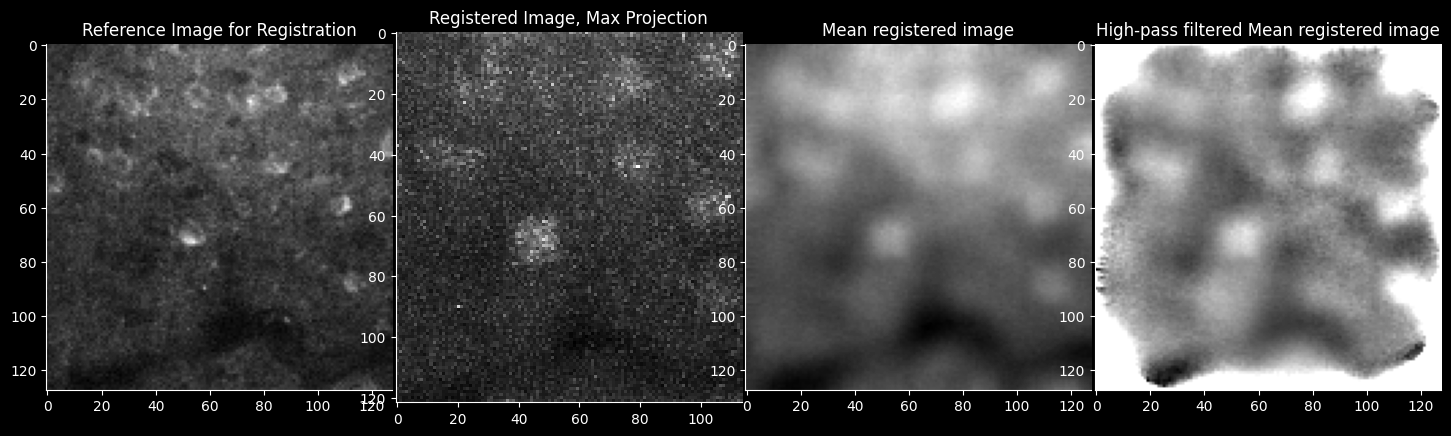

In [129]:
plt.subplot(1, 4, 1)
plt.imshow(output_ops['refImg'], cmap='gray', )
plt.title("Reference Image for Registration");

plt.subplot(1, 4, 2)
plt.imshow(output_ops['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection");

plt.subplot(1, 4, 3)
plt.imshow(output_ops['meanImg'], cmap='gray')
plt.title("Mean registered image")

plt.subplot(1, 4, 4)
plt.imshow(output_ops['meanImgE'], cmap='gray')
plt.title("High-pass filtered Mean registered image");

In [123]:
stats_file = Path(output_ops['save_path']).joinpath('stat.npy')
iscell = np.load(Path(output_ops['save_path']).joinpath('iscell.npy'), allow_pickle=True)[:, 0].astype(bool)
stats = np.load(stats_file, allow_pickle=True)
stats.shape, iscell.shape

((56,), (56,))

/tmp/ipykernel_2744406/2986013853.py:9: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(im, axis=0), cmap='jet')
/tmp/ipykernel_2744406/2986013853.py:13: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(im[~iscell], axis=0, ), cmap='jet')
/tmp/ipykernel_2744406/2986013853.py:17: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(im[iscell], axis=0), cmap='jet')


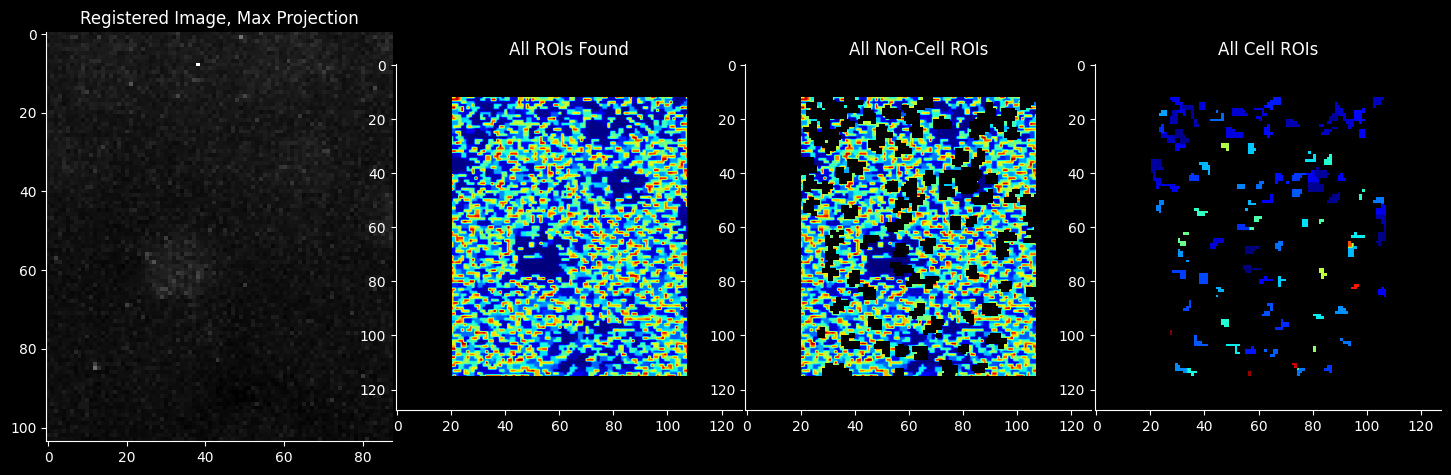

In [85]:
im = suite2p.ROI.stats_dicts_to_3d_array(stats, Ly=output_ops['Ly'], Lx=output_ops['Lx'], label_id=True)
im[im == 0] = np.nan

plt.subplot(1, 4, 1)
plt.imshow(output_ops['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection")

plt.subplot(1, 4, 2)
plt.imshow(np.nanmax(im, axis=0), cmap='jet')
plt.title("All ROIs Found")

plt.subplot(1, 4, 3)
plt.imshow(np.nanmax(im[~iscell], axis=0, ), cmap='jet')
plt.title("All Non-Cell ROIs")

plt.subplot(1, 4, 4)
plt.imshow(np.nanmax(im[iscell], axis=0), cmap='jet')
plt.title("All Cell ROIs");

In [72]:
f_cells = np.load(Path(output_ops['save_path']).joinpath('F.npy'))
f_neuropils = np.load(Path(output_ops['save_path']).joinpath('Fneu.npy'))
spks = np.load(Path(output_ops['save_path']).joinpath('spks.npy'))
f_cells.shape, f_neuropils.shape, spks.shape

((26, 5000), (26, 5000), (26, 5000))

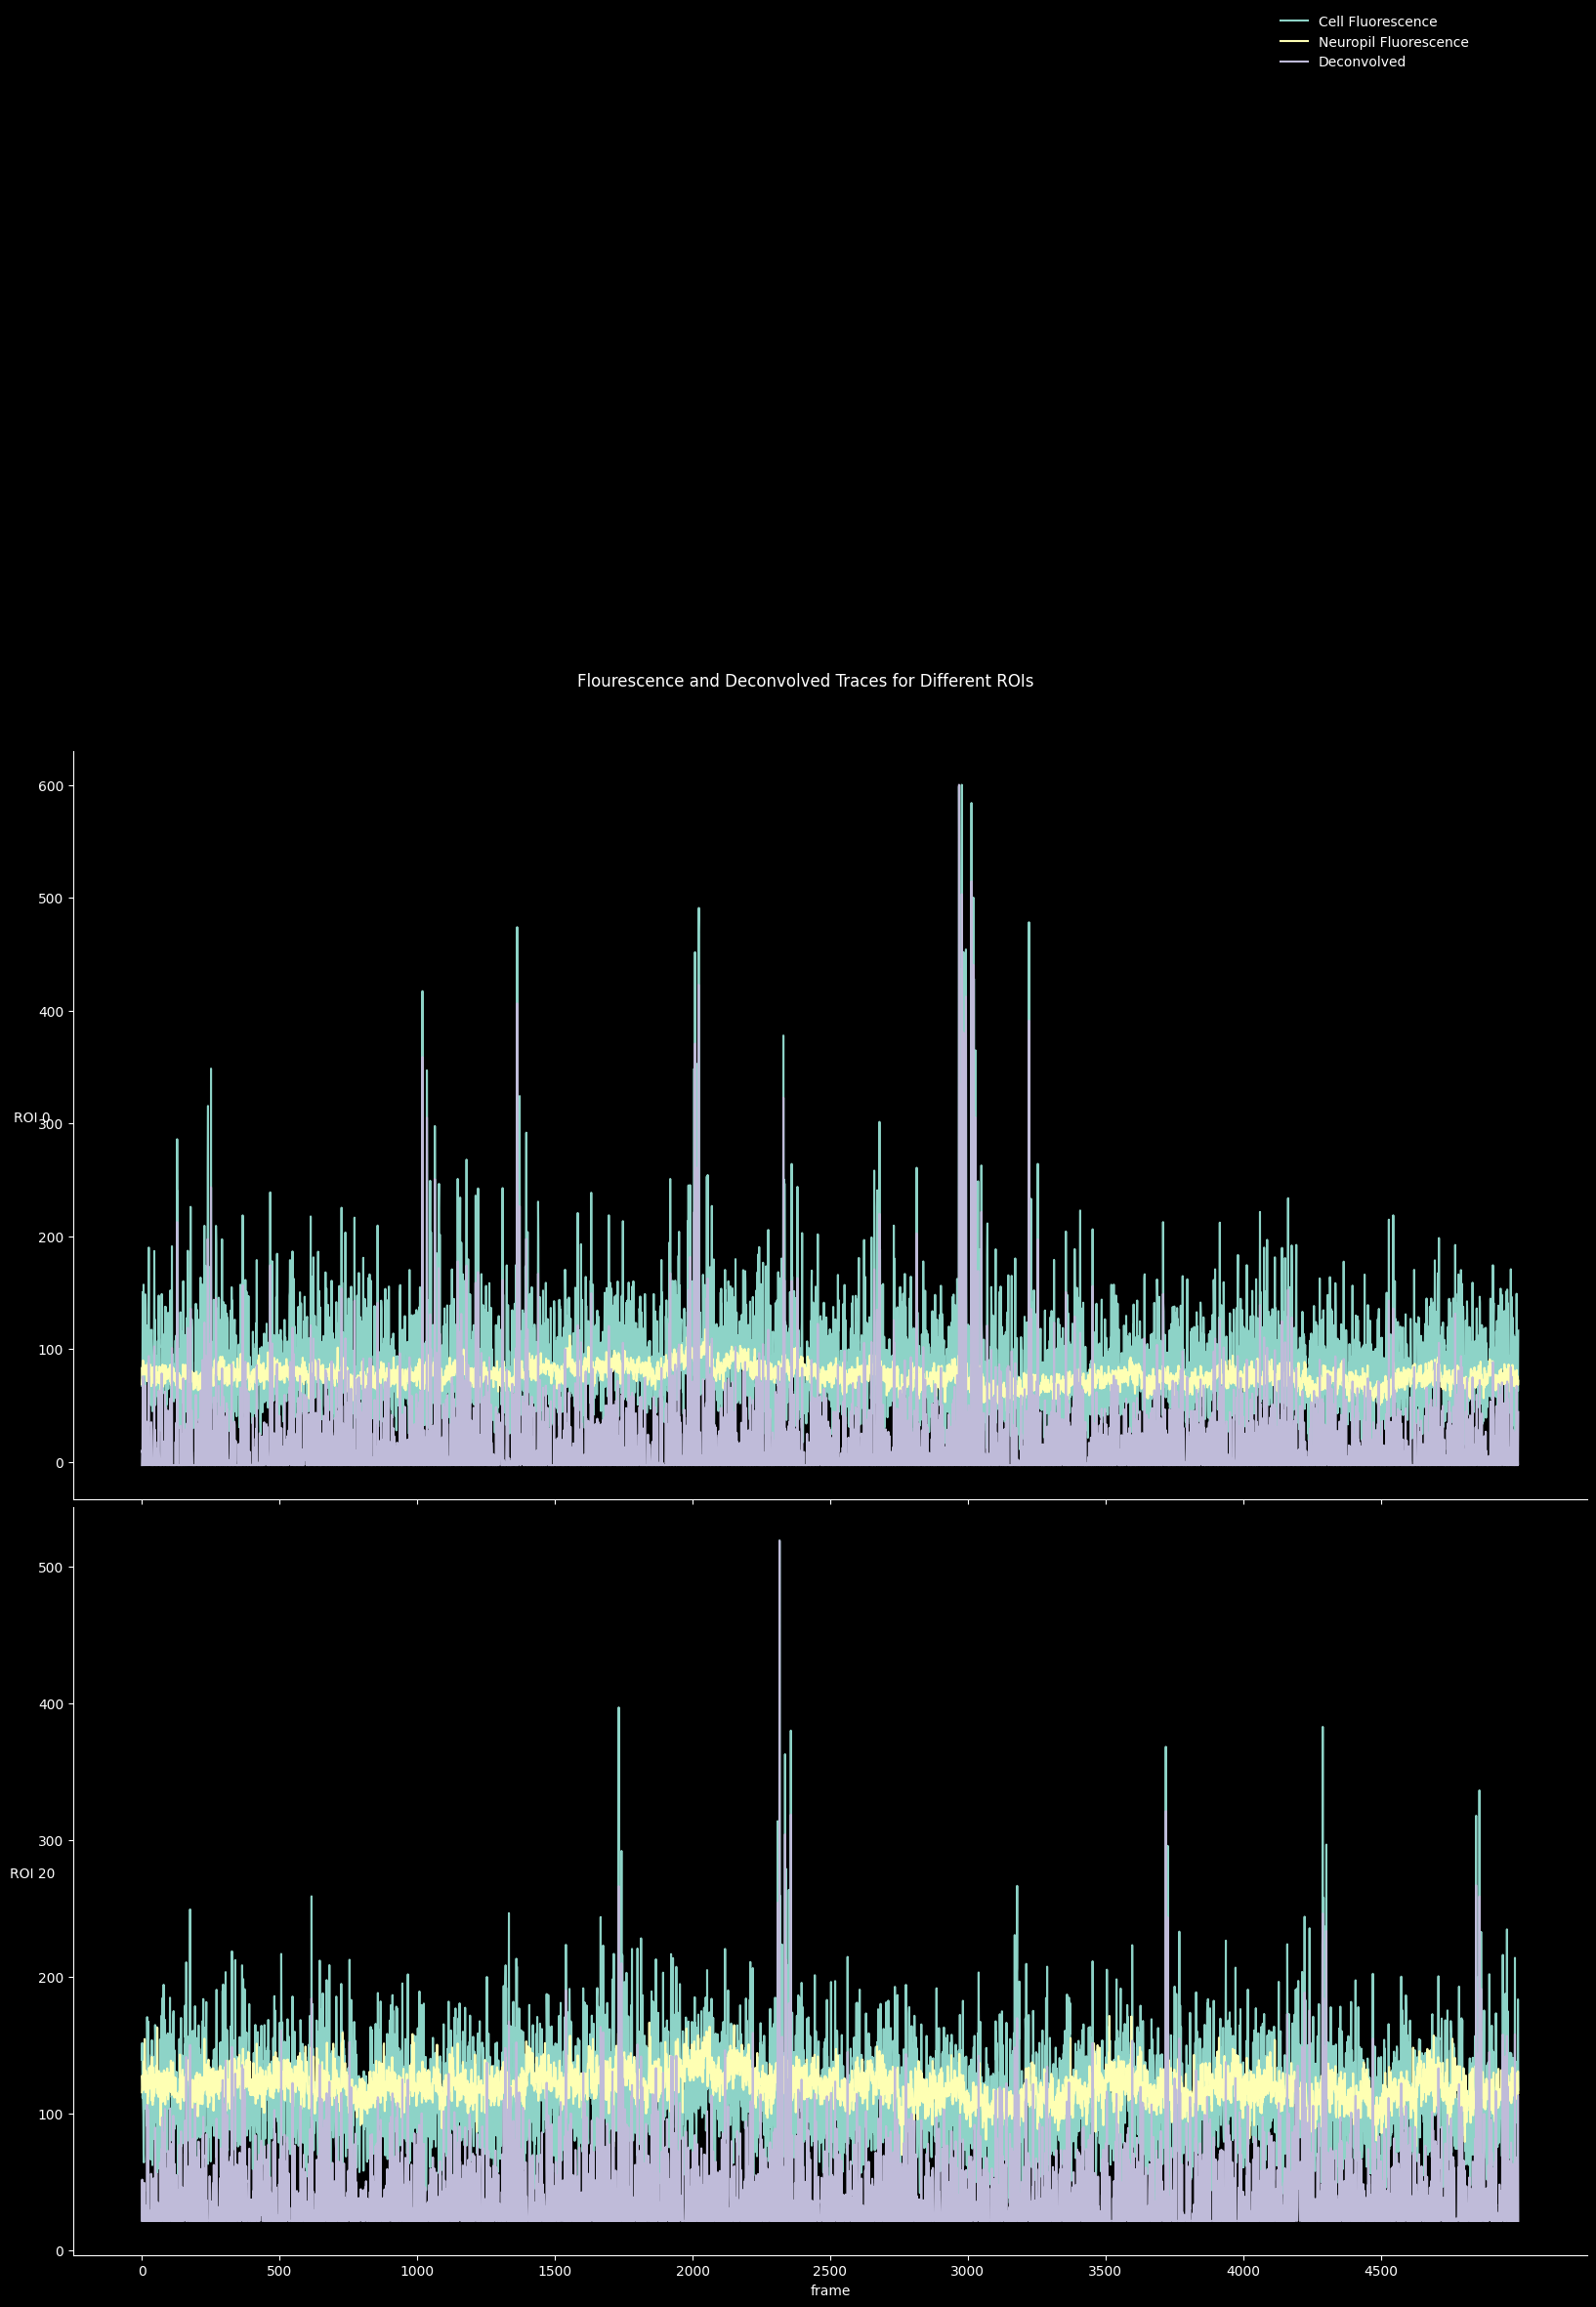

In [73]:
plt.figure(figsize=[20,20])
plt.suptitle("Flourescence and Deconvolved Traces for Different ROIs", y=0.92);
rois = np.arange(len(f_cells))[::20]
for i, roi in enumerate(rois):
    plt.subplot(len(rois), 1, i+1, )
    f = f_cells[roi]
    f_neu = f_neuropils[roi]
    sp = spks[roi]
    # Adjust spks range to match range of fluroescence traces
    fmax = np.maximum(f.max(), f_neu.max())
    fmin = np.minimum(f.min(), f_neu.min())
    frange = fmax - fmin
    sp /= sp.max()
    sp *= frange
    plt.plot(f, label="Cell Fluorescence")
    plt.plot(f_neu, label="Neuropil Fluorescence")
    plt.plot(sp + fmin, label="Deconvolved")
    plt.xticks(np.arange(0, f_cells.shape[1], f_cells.shape[1]/10))
    plt.ylabel(f"ROI {roi}", rotation=0)
    plt.xlabel("frame")
    if i == 0:
        plt.legend(bbox_to_anchor=(0.93, 2))